# Mengenal Jenis-Jenis Visualisasi Data dan Tujuannya

Ada banyak sekali jenis visualisasi data, dari yang sederhana hingga yang kompleks. Setiap jenis visualisasi biasanya lebih tepat digunakan untuk suatu tujuan tertentu. Secara garis besar, ada **empat tujuan visualisasi** yang disampaikan oleh **Andrew Abela** sesuai gambar berikut.

<img src="Jenis Visualisasi.png" style = "width : 900 px; height : 900px">

Berikut penjelasannya:

**1. Perbandingan/Komparasi**

Jika ingin membandingkan suatu sekumpulan nilai dengan nilai lainnya, ingin melihat mana yang lebih besar, mana yang lebih tinggi, mana yang naik, dsb. Untuk data yang terkait dengan waktu, visualisasi yang digunakan biasanya berupa line-chart. Sedangkan, jika yang dibandingkan adalah kategorikal, maka lebih cocok menggunakan bar-chart.

**2. Distribusi**

Bila ingin melihat distribusi/persebaran data di suatu variabel. Visualisasi yang lazim digunakan adalah histogram. Bisa melihat apakah datanya banyak terkumpul di nilai-nilai kecil, berat di kanan, atau simetris, ataupun berdistribusi normal. Untuk melihat distribusi di dua variabel, scatterplot juga bisa digunakan.

**3. Komposisi**

Digunakan untuk melihat komposisi dari suatu variabel, jika di-breakdown terhadap suatu dimensi data. Visualisasi yang biasa digunakan adalah stacked bar-chart untuk data kategorikal, atau stacked line-chart untuk data terkait waktu.

**4. Keterhubungan/Relasi**

Ketika ingin melihat keterhubungan antara suatu variabel dengan variabel lain. Misalnya ingin cek, jika variabel A semakin tinggi, apakah variabel B juga semakin tinggi, atau justru lebih rendah, atau tidak ada keterhubungannya. Visualisasi yang biasa digunakan untuk tujuan ini adalah scatter-plot.

 

### Membuat Multi-Line Chart

breakdown data penjualan berdasarkan dimensi yah, misalnya berdasarkan brand atau province. Nanti akan terlihat bagian mana yang paling berperan dalam kenaikan GMV ini

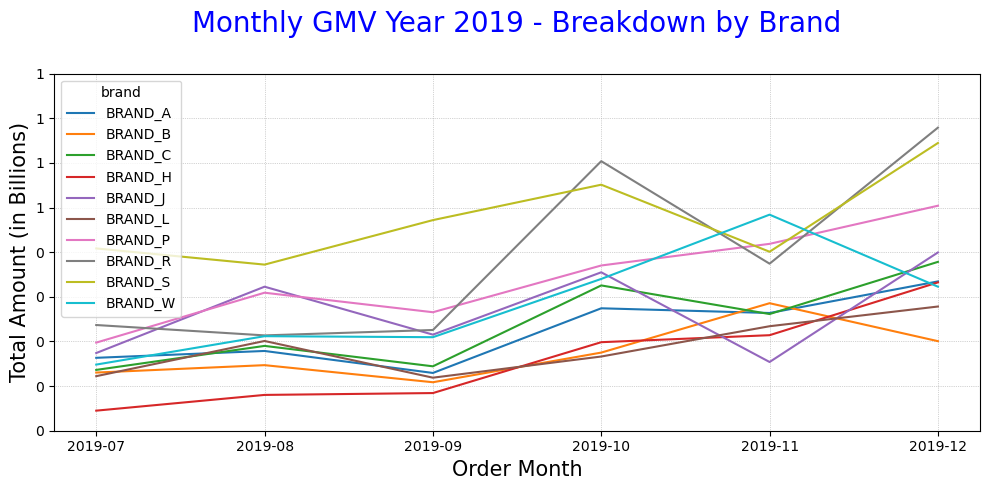

In [3]:
# Import library
import datetime
import pandas as pd
import matplotlib.pyplot as plt
# Baca dataset
dataset = pd.read_csv('https://storage.googleapis.com/dqlab-dataset/retail_raw_reduced.csv')
# Buat kolom baru yang bertipe datetime dalam format '%Y-%m'
dataset['order_month'] = dataset['order_date'].apply(lambda x: datetime.datetime.strptime(x, "%Y-%m-%d").strftime('%Y-%m'))
# Buat Kolom GMV
dataset['gmv'] = dataset['item_price']*dataset['quantity']

# Buat Multi-Line Chart
dataset.groupby(['order_month','brand'])['gmv'].sum().unstack().plot()
plt.title('Monthly GMV Year 2019 - Breakdown by Brand', loc='center',pad=30,fontsize=20,color='blue')
plt.xlabel('Order Month',fontsize=15)
plt.ylabel('Total Amount (in Billions)',fontsize=15)
plt.grid(color='darkgray',linestyle=':',linewidth=0.5)
plt.ylim(ymin=0)
labels, locations = plt.yticks()
plt.yticks(labels, (labels/1000000000).astype(int))
plt.gcf().set_size_inches(10,5)
plt.tight_layout()
plt.show()

### Kustomisasi Legend

kita punya komponen baru ya di sini, namanya **legend**. Berhubung brand-nya ada banyak, dan default-nya di tengah makanya jadi menutupi grafiknya. Solusinya adalah kita pakai function khusus.

Atur komponen legend menggunakan function **plt.legend()** seperti yang ditunjukkan oleh potongan kode berikut ini:

    plt.legend(loc='right', bbox_to_anchor=(1.6,0.5),shadow=True, ncol=2)

Beberapa parameter yang bisa ditambahkan untuk legend:

    1. loc: untuk menentukan posisi legend, berikut beberapa lokasi legend yang bisa didefinisikan:
            - 'upper left', 'upper right', 'lower left', 'lower right':legend diletakkan di pojok dari axes (atas kiri, atas kanan, bawah kiri, atas kiri)
            - 'upper center', 'lower center', 'center left', 'center right': legend diletakkan di tepi axes (atas tengah, bawah tengah, tengah kiri, tengah kanan)
            - 'center': legend diletakkan di tengah-tengah axes
            - 'best': matplotlib akan memilih satu dari sekian kemungkinan lokasi legend di atas yang paling tidak overlap dengan isi grafik
    2. bbox_to_anchor: biasanya digunakan untuk adjust lokasi dari legend. Bisa berisi 2 angka yang menunjukkan koordinat x dan y (misal (1.6,0.5) berarti geser 1.6 ke kanan dan 0.5 ke atas). Bisa juga berisi 4 angka, angka ketiga dan keempat menyatakan width (lebar) dan height (tinggi) dari legend.
    3. shadow: jika diisi True, maka kotak legend akan memiliki bayangan.
    4. ncol: jumlah kolom dari isi legend, default-nya adalah 1
    5. fontsize: ukuran huruf pada legend
    6. title: memberikan judul pada legend
    7. title_fontsize: ukuran huruf pada judul legend

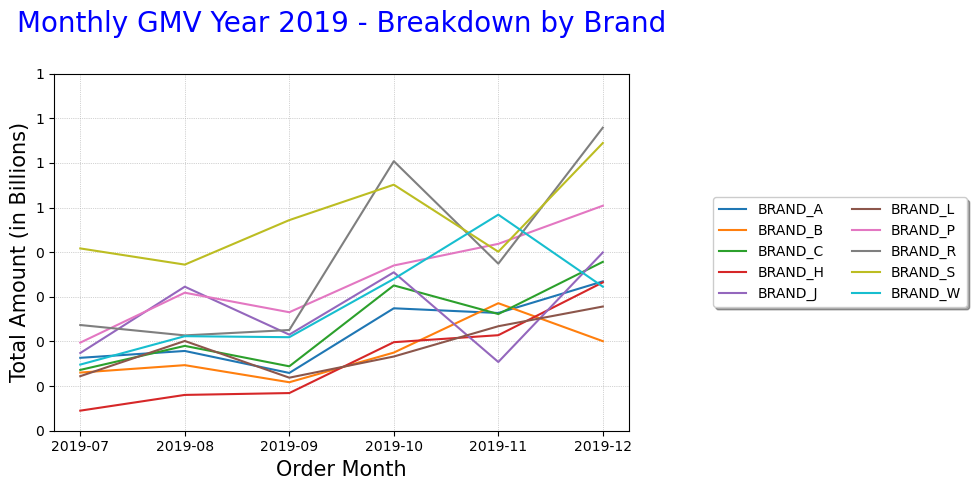

In [5]:

dataset.groupby(['order_month','brand'])['gmv'].sum().unstack().plot()
plt.title('Monthly GMV Year 2019 - Breakdown by Brand',loc='center',pad=30, fontsize=20, color='blue')
plt.xlabel('Order Month', fontsize = 15)
plt.ylabel('Total Amount (in Billions)',fontsize = 15)
plt.grid(color='darkgray', linestyle=':', linewidth=0.5)
plt.ylim(ymin=0)
labels, locations = plt.yticks()
plt.yticks(labels, (labels/1000000000).astype(int))
plt.legend(loc='right', bbox_to_anchor=(1.6,0.5),shadow=True, ncol=2)
plt.gcf().set_size_inches(12, 5)
plt.tight_layout()
plt.show()

### Kustomisasi Colormap

Kalau sudah di breakdown by brand seperti ini terlihat ya trend sepanjang Oktober-Desember 2019 ini mirip semua. Jadi kemungkinan tidak ada faktor dari brand yang membuat GMV kita naik. Kita coba perlihatkan data breakdown by province.

Aku pun segera mengganti brand menjadi province. Sekaligus buat legend-nya di bawah dengan judulnya dengan detail seperti ini:

<Figure size 640x480 with 0 Axes>

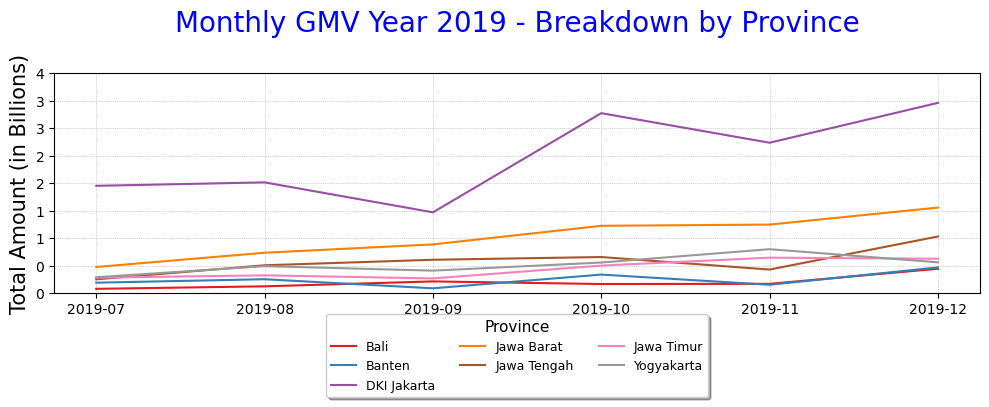

In [6]:

plt.clf()
dataset.groupby(['order_month','province'])['gmv'].sum().unstack().plot(cmap='Set1')
plt.title('Monthly GMV Year 2019 - Breakdown by Province', loc='center', pad=30, fontsize=20, color='blue')
plt.xlabel('Order Month', fontsize=15)
plt.ylabel('Total Amount (in Billions)', fontsize=15)
plt.grid(color='darkgray', linestyle=':', linewidth=0.5)
plt.ylim(ymin=0)
labels, locations = plt.yticks()
plt.yticks(labels, (labels/1000000000).astype(int))
plt.legend(loc='lower center', bbox_to_anchor=(0.5,-0.5), shadow=True, ncol=3, title='Province', fontsize=9, title_fontsize=11)
plt.gcf().set_size_inches(10, 5)
plt.tight_layout()
plt.show()

Selain itu, perhatikan juga bahwa pada grafik tersebut, list warnanya berbeda, tidak default seperti pada brand. Itu karena di function **plot()** ditambahkan parameter **cmap** (yakni, color map) yang mendefinisikan sekelompok warna yang akan diberikan untuk tiap line. Di sini yang digunakan adalah **‘Set1’**, yakni satu set warna yang biasa digunakan untuk warna yang diskrit. Untuk mengetahui jenis-jenis color map, bisa dilihat di halaman web berikut: https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html.

Dari grafik ini, terlihat ada beberapa provinsi yang mendominasi kenaikan GMV, seperti DKI Jakarta dan Jawa Barat. Tapi karena provinsinya banyak, yang bawah-bawah jadi kurang jelasnya. Bercampur semua begitu garisnya.

### Membuat Line Chart GMV Breakdown by Top Provinces

Oke, sudah terlihat cukup jelas jika kenaikan GMW disebabkan oleh provinsi. Berhubung kita fokusnya ke provinsi-provinsi yang GMV-nya besar, kalau begitu kita highlight untuk top 5 provinsi saja, yang lainnya kita gabungkan menjadi "other"
Aku berusaha membantu dengan segera mengecek lima provinsi dengan GMV tertinggi terlebih dulu:

    # Buat variabel untuk 5 propinsi dengan GMV tertinggi
    top_provinces = (dataset.groupby('province')['gmv']
                            .sum()
                            .reset_index()
                            .sort_values(by='gmv',ascending=False)
                            .head(5))
    print(top_provinces)

Setelah itu, membuat kolom baru, misalnya **‘province_top’**. Seperti sebelumnya, manfaatkan function apply & lambda.

    # Buat satu kolom lagi di dataset dengan nama province_top
    dataset['province_top'] = dataset['province'].apply(lambda x: x if (x in top_provinces['province'].to_list()) else 'other')

Kemudian, setelah memiliki kolom baru, grafiknya bisa di update. Sebagai catatan, untuk mengubah ukuran figure, juga bisa menggunakan function **plt.gcf().set_size_inches** yang diletakkan di akhir code, sebelum **plt.show()**. 


    # Plot multi-line chartnya
    import matplotlib.pyplot as plt
    dataset.groupby(['order_month','province_top'])['gmv'].sum().unstack().plot(marker='.', cmap='plasma')
    plt.title('Monthly GMV Year 2019 - Breakdown by Province', loc='center', pad=30, fontsize = 20, color='blue')
    plt.xlabel('Order Month', fontsize = 15)
    plt.ylabel('Total Amount (in Billions)', fontsize = 15)
    plt.grid(color='darkgray', linestyle= ':', linewidth=0.5)
    plt.ylim(ymin=0)
    labels, locations = plt.yticks()
    plt.yticks(labels, (labels/1000000000).astype(int))
    plt.legend(loc='upper center', bbox_to_anchor=(1.1,1), shadow=True, ncol=1)
    plt.gcf().set_size_inches(12,5)
    plt.tight_layout()
    plt.show()

      province          gmv
2  DKI Jakarta  14902763000
3   Jawa Barat   6128149000
4  Jawa Tengah   3485884000
6   Yogyakarta   3111241000
5   Jawa Timur   2649486000


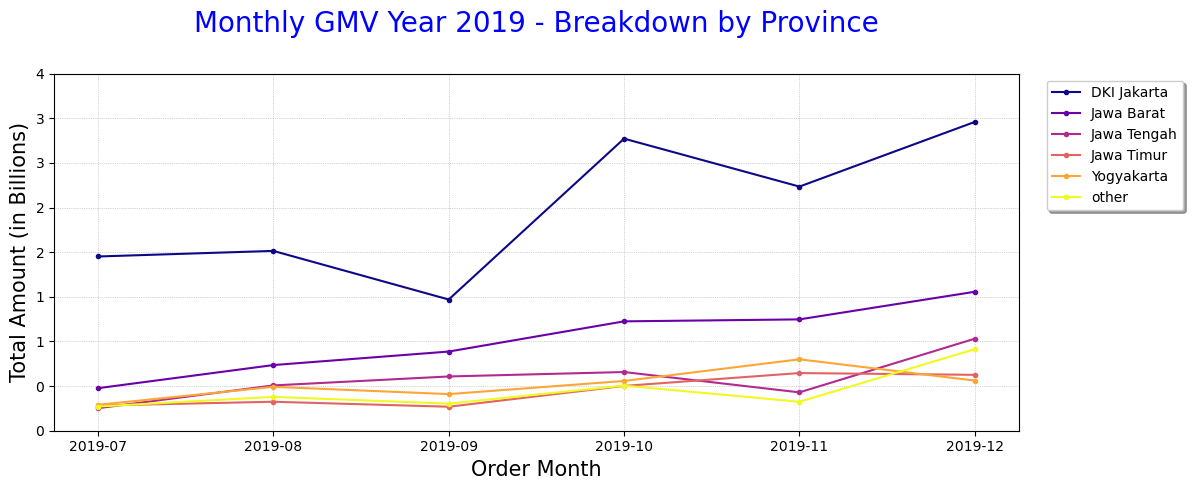

In [7]:

# Buat variabel untuk 5 propinsi dengan GMV tertinggi
top_provinces = (dataset.groupby('province')['gmv']
                        .sum()
                        .reset_index()
                        .sort_values(by='gmv',ascending=False)
                        .head(5))
print(top_provinces)

# Buat satu kolom lagi di dataset dengan nama province_top
dataset['province_top'] = dataset['province'].apply(lambda x: x if (x in top_provinces['province'].to_list()) else 'other')

# Plot multi-line chartnya
import matplotlib.pyplot as plt
dataset.groupby(['order_month','province_top'])['gmv'].sum().unstack().plot(marker='.', cmap='plasma')
plt.title('Monthly GMV Year 2019 - Breakdown by Province', loc='center', pad=30, fontsize = 20, color='blue')
plt.xlabel('Order Month', fontsize = 15)
plt.ylabel('Total Amount (in Billions)', fontsize = 15)
plt.grid(color='darkgray', linestyle= ':', linewidth=0.5)
plt.ylim(ymin=0)
labels, locations = plt.yticks()
plt.yticks(labels, (labels/1000000000).astype(int))
plt.legend(loc='upper center', bbox_to_anchor=(1.1,1), shadow=True, ncol=1)
plt.gcf().set_size_inches(12,5)
plt.tight_layout()
plt.show()

## Membuat Anotasi

Anotasi itu mirip seperti teks, hanya saja ada suatu titik tertentu yang kita tunjuk untuk diberikan informasi tambahan. Selain itu, kita bisa menambahkan panah melalui anotasi

Untuk membuat annotate, gunakan function **plt.annotate**. Parameter pertama adalah isi teksnya, dan parameter kedua adalah koordinat dari point yang dianotasi.

Selain itu ada beberapa parameter untuk anotasi yang bisa ditambahkan:

        1. xytext: Koordinat dari teks. Jika tidak diisi,maka teks akan diletakkan di koordinat point yang dianotasi (parameter kedua)
        2. arrowprops:Konfigurasi dari panah yang ditambahkan di anotasi, berupa dictionary. Beberapa hal yang bisa diset:
                - arrowstyle: menentukan bentuk dari panah penunjuk. Isinya bisa berupa bentuk seperti '->', '-|>', '<->', '-[', dsb. Bisa juga berupa tulisan seperti 'fancy', 'simple', 'wedge', etc.
                - connectionstyle: menentukan bentuk dari garis panahnya. Ada beberapa nilai yang bisa digunakan, misalnya 'arc' dan 'arc3' yang berupa garis lurus, 'angle' untuk garis berbelok siku, 'angle3' untuk garis berbelok lengkung, atau 'bar' untuk berbelok siku dua kali.
                - color: menentukan warna dari panah
 
Berikut adalah kode yang digunakan untuk menganotasi multi-line chart dari 5 provinsi dengan GMV tertinggi:

        # Anotasi pertama
        plt.annotate('GMV other meningkat pesat', xy=(5, 900000000), xytext=(4, 1700000000), weight='bold', color='red', arrowprops=dict(arrowstyle='fancy', connectionstyle='arc3', color='red'))

        # Anotasi kedua
        plt.annotate('DKI Jakarta mendominasi', xy=(3,3350000000), xytext=(0, 3700000000), weight='bold', color='red',arrowprops=dict(arrowstyle='->', connectionstyle='angle', color='red'))

        plt.gcf().set_size_inches(12, 5)
        plt.tight_layout()
        plt.show()

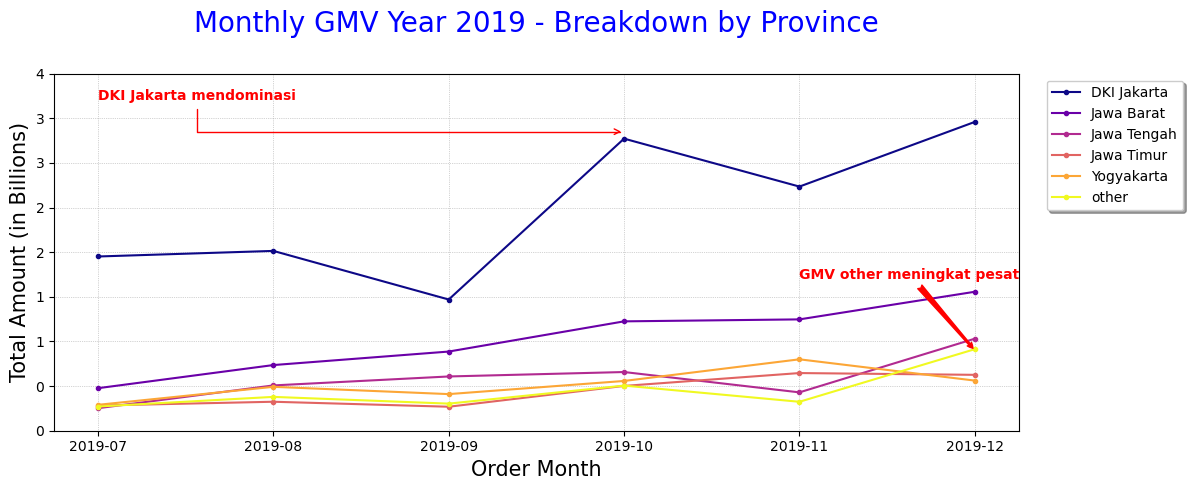

In [8]:

dataset.groupby(['order_month','province_top'])['gmv'].sum().unstack().plot(marker='.', cmap='plasma')
plt.title('Monthly GMV Year 2019 - Breakdown by Province',loc='center',pad=30, fontsize=20, color='blue')
plt.xlabel('Order Month', fontsize = 15)
plt.ylabel('Total Amount (in Billions)',fontsize = 15)
plt.grid(color='darkgray', linestyle=':', linewidth=0.5)
plt.ylim(ymin=0)
labels, locations = plt.yticks()
plt.yticks(labels, (labels/1000000000).astype(int))
plt.legend(loc='upper center', bbox_to_anchor=(1.1, 1), shadow=True, ncol=1)

# Anotasi pertama
plt.annotate('GMV other meningkat pesat', xy=(5, 900000000), xytext=(4, 1700000000), weight='bold', color='red', arrowprops=dict(arrowstyle='fancy', connectionstyle='arc3', color='red'))

# Anotasi kedua
plt.annotate('DKI Jakarta mendominasi', xy=(3,3350000000), xytext=(0, 3700000000), weight='bold', color='red',arrowprops=dict(arrowstyle='->', connectionstyle='angle', color='red'))

plt.gcf().set_size_inches(12, 5)
plt.tight_layout()
plt.show()

## Membuat Subset Data

“Sudah aku sampaikan ke kepala cabang. Ini insight yang menarik menurut beliau. Ada rikues kalau provinsi ‘other’ ini, kita analisis lagi di lain waktu saja dan fokuskan untuk analisis behavior transaksi di DKI Jakarta pada bulan Oktober-Desember 2019 ini, karena trend-nya mirip dengan overall GMV. Kita fokuskan ke sana ya,”

“Oke, aku coba cek dulu perbandingan GMV di kota-kota di DKI Jakarta itu seperti apa,”

“Iya, berhubung kita mau fokus ke provinsi DKI Jakarta dan bulan Oktober-Desember 2019, kita filter saja datanya dan disimpan ke dataframe baru" menggunakan dataframe **dataset_dki_q4**.

    dataset_dki_q4 = dataset[(dataset['province']=='DKI Jakarta') & (dataset['order_month'] >= '2019-10')]
    print(dataset_dki_q4.head())

In [9]:
dataset_dki_q4 = dataset[(dataset['province']=='DKI Jakarta') & (dataset['order_month'] >= '2019-10')]
print(dataset_dki_q4.head())

   order_id  order_date  customer_id             city     province product_id  \
0   1703458  2019-10-17        14004  Jakarta Selatan  DKI Jakarta      P1910   
1   1706815  2019-10-24        17220  Jakarta Selatan  DKI Jakarta      P2934   
2   1710718  2019-11-03        16518    Jakarta Utara  DKI Jakarta      P0908   
4   1702573  2019-10-16        15696    Jakarta Timur  DKI Jakarta      P2968   
6   1711399  2019-11-04        16791    Jakarta Barat  DKI Jakarta      P0860   

     brand  quantity  item_price order_month      gmv province_top  
0  BRAND_J        10      740000     2019-10  7400000  DKI Jakarta  
1  BRAND_R         2      604000     2019-10  1208000  DKI Jakarta  
2  BRAND_C         8     1045000     2019-11  8360000  DKI Jakarta  
4  BRAND_R         2     4475000     2019-10  8950000  DKI Jakarta  
6  BRAND_C         1     1465000     2019-11  1465000  DKI Jakarta  


## Membuat Pie Chart

cara membuat pie chart, Kita perlu membuat dulu dataframe agregat.

Misalnya **gmv_per_city_dki_q4**, masukkan datanya ke function **plt.pie()**.

Beberapa parameter yang bisa dimodifikasi:

    1. labels: array yang berisikan label/tulisan yang ditunjukkan untuk masing-masing bagian pie.
    2. colors: array yang berisikan warna untuk masing-masing bagian pie.
    3. autopct: format untuk nilai persentase yang ditampilkan, bisa berupa string atau function.
    4. shadow: jika diisi True, maka ada bayangan untuk pie chart-nya. Default-nya adalah False.
    5. radius: jari-jari dari pie-chart.

seperti code berikut :

    gmv_per_city_dki_q4 = dataset_dki_q4.groupby('city')['gmv'].sum().reset_index()
    plt.figure(figsize=(6,6))
    plt.pie(gmv_per_city_dki_q4['gmv'], labels = gmv_per_city_dki_q4['city'],autopct='%1.2f%%')
    plt.title('GMV Contribution Per City - DKI Jakarta in Q4 2019', loc='center', pad=30, fontsize=15, color='blue')
    plt.show()

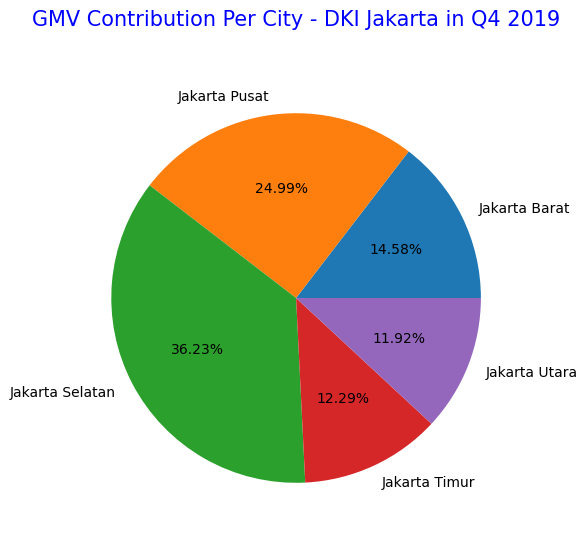

In [10]:
gmv_per_city_dki_q4 = dataset_dki_q4.groupby('city')['gmv'].sum().reset_index()
plt.figure(figsize=(6,6))
plt.pie(gmv_per_city_dki_q4['gmv'], labels = gmv_per_city_dki_q4['city'],autopct='%1.2f%%')
plt.title('GMV Contribution Per City - DKI Jakarta in Q4 2019', loc='center', pad=30, fontsize=15, color='blue')
plt.show()

## Membuat Bar Chart

Selain menggunakan pie chart, kita bisa pakai **bar chart**
Alternatif lain untuk membandingkan GMV tiap kota adalah dengan barchart. Saya lebih menyukai visualisasi ini karena lebih mudah terlihat perbandingan antar kota.”

Syntax dalam praktik membuat bar chart mirip dengan **line chart**, tentukan nilai untuk sumbu-x dan sumbu-y, lalu tambahkan parameter **kind='bar'** seperti berikut ini:

    plt.clf()
    dataset_dki_q4.groupby('city')['gmv'].sum().sort_values(ascending=False).plot(kind='bar', color='green')
    plt.title('GMV Per City - DKI Jakarta in Q4 2019', loc='center', pad =30, fontsize=15, color='blue')
    plt.xlabel('City', fontsize=15)
    plt.ylabel('Total Amount (in Billions)', fontsize=15)
    plt.ylim(ymin=0)
    labels, locations = plt.yticks()
    plt.yticks(labels, (labels/1000000000).astype(int))
    plt.xticks(rotation=0)
    plt.show()

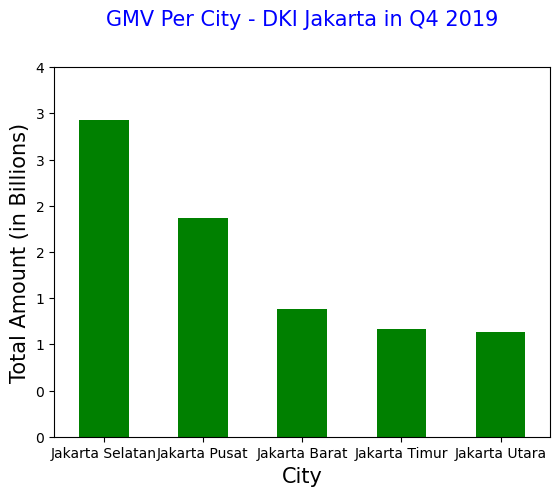

In [11]:

plt.clf()
dataset_dki_q4.groupby('city')['gmv'].sum().sort_values(ascending=False).plot(kind='bar', color='green')
plt.title('GMV Per City - DKI Jakarta in Q4 2019', loc='center', pad =30, fontsize=15, color='blue')
plt.xlabel('City', fontsize=15)
plt.ylabel('Total Amount (in Billions)', fontsize=15)
plt.ylim(ymin=0)
labels, locations = plt.yticks()
plt.yticks(labels, (labels/1000000000).astype(int))
plt.xticks(rotation=0)
plt.show()

Perhatikan di sini juga ditambahkan parameter rotation di **plt.xtick()** untuk memutar label di sumbu-x.

Sebagai catatan, jika ingin barchart-nya **horizontal, maka bisa mengganti parameternya menjadi kind='barh'**, dengan tentu saja tidak lupa juga harus menyesuaikan sumbu x dan y-nya.

## Membuat Multi-Bar Chart

dari grafik ini, kelihatannya Jakarta Selatan dan Jakarta Pusat lumayan mendominasi GMV. Tapi apakah ini konsisten di setiap bulan? Bisa tolong tampilkan?

“Bisa. Bentar yah, ini aku buatkan dulu multi-barchart untuk analisisnya :


    dataset_dki_q4.groupby(['city','order_month'])['gmv'].sum().unstack().plot(kind='bar')
    plt.title('GMV Per City, Breakdown by Month\nDKI Jakarta in Q4 2019', loc='center', pad=30, fontsize=15, color='blue')
    plt.xlabel('Province', fontsize=12)
    plt.ylabel('Total Amount (in Billions)', fontsize=12)
    plt.legend(bbox_to_anchor=(1,1), shadow=True, title='Month')
    plt.ylim(ymin=0)
    labels, locations = plt.yticks()
    plt.yticks(labels, (labels/1000000000).astype(int))
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

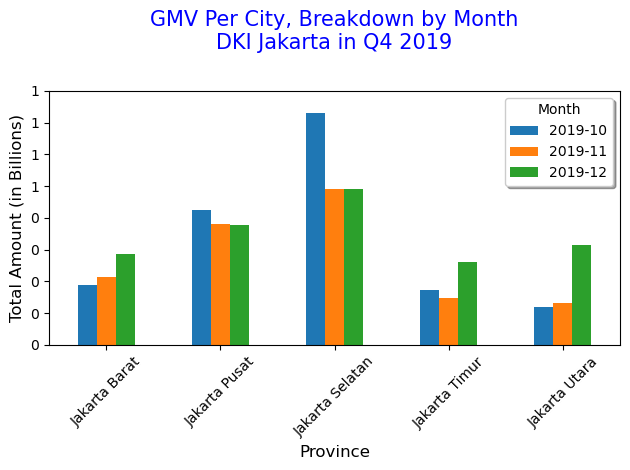

In [12]:

dataset_dki_q4.groupby(['city','order_month'])['gmv'].sum().unstack().plot(kind='bar')
plt.title('GMV Per City, Breakdown by Month\nDKI Jakarta in Q4 2019', loc='center', pad=30, fontsize=15, color='blue')
plt.xlabel('Province', fontsize=12)
plt.ylabel('Total Amount (in Billions)', fontsize=12)
plt.legend(bbox_to_anchor=(1,1), shadow=True, title='Month')
plt.ylim(ymin=0)
labels, locations = plt.yticks()
plt.yticks(labels, (labels/1000000000).astype(int))
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Membuat Stacked Chart

Ini udah lebih jelas. Sebagai pembanding saja, bagaimana kalau kita ubah multi-bar chart sebelumnya menjadi **stacked barchart**


    dataset_dki_q4.groupby(['order_month','city'])['gmv'].sum().sort_values(ascending=False).unstack().plot(kind='bar',stacked=True)
    plt.title('GMV Per Month, Breakdown by City\nDKI Jakarta in Q4 2019', loc='center', pad=30, fontsize=15, color='blue')
    plt.xlabel('Order Month', fontsize=12)
    plt.ylabel('Total Amount (in Billions)', fontsize=12)
    plt.legend(bbox_to_anchor=(1,1), shadow=True, ncol=1 , title='city')
    plt.ylim(ymin=0)
    labels, locations = plt.yticks()
    plt.yticks(labels, (labels/1000000000).astype(int))
    plt.xticks(rotation=0)
    plt.tight_layout()
    plt.show()

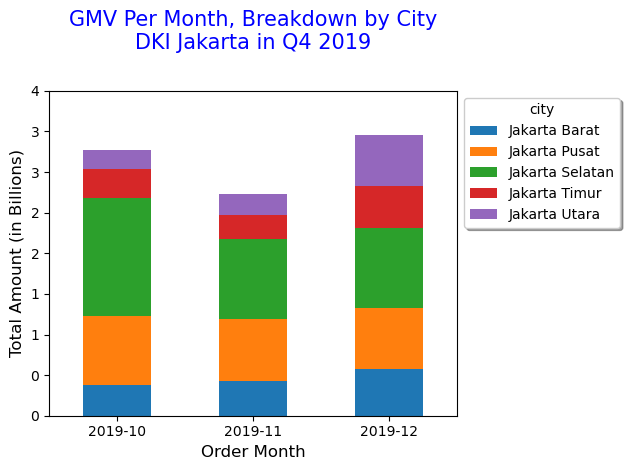

In [13]:

dataset_dki_q4.groupby(['order_month','city'])['gmv'].sum().sort_values(ascending=False).unstack().plot(kind='bar',stacked=True)
plt.title('GMV Per Month, Breakdown by City\nDKI Jakarta in Q4 2019', loc='center', pad=30, fontsize=15, color='blue')
plt.xlabel('Order Month', fontsize=12)
plt.ylabel('Total Amount (in Billions)', fontsize=12)
plt.legend(bbox_to_anchor=(1,1), shadow=True, ncol=1 , title='city')
plt.ylim(ymin=0)
labels, locations = plt.yticks()
plt.yticks(labels, (labels/1000000000).astype(int))
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

"Dari kedua chart tersebut, kita sama-sama bisa melihat pola bahwa kebanyakan GMV turun dari bulan Oktober ke November, tetapi lalu naik pesat di bulan Desember. Untuk di Jakarta Barat, GMV November justru naik dari Oktober. Sedangkan di Jakarta Selatan, GMV Desember justru lebih kecil daripada GMV Oktober". 

"Hmm, padahal Jakarta Selatan adalah penyumbang GMV paling besar ya. Berarti kita harus menyarankan tim bisnis untuk genjot lagi penjualan di sana, agar trend-nya naik kembali, seperti kota-kota lainnya. Akan saya bawa kembali hasil temuan kamu ini ke Andra dan kepala cabang. Terima kasih.”